# Documentation For Prototype 1B Muon Data Analysis

This notebook contains the documentation for the CAMAC Analysis (Prototype 1B Muon Data Analysis) program. It aims to explain the pipeline of the analysis process and also explain the API available with the program.

### Content Reference:
* [Data Analysis Pipeline](#first-bullet)
* [Muon Data Frame](#second-bullet)
* [API for Data Analysis](#third-bullet)
* [API for Plotting](#fourth-bullet)
* [API for Reports](#fifth-bullet)
* [GUI Interface](#sixth)


## The Data Analysis Process Pipeline <a class="anchor" id="first-bullet"></a>


### The initial data frame
The raw data in `.bin` format is first passed as an argument to the `sas_analysis.py` code to create a `.ftr` containing the necassary data frame. The following shell script shows an example of the process.

```
python3 sas_analysis.py ../CrateCode/run800.bin
```

### The advanced Muon Data Frame
This process takes as input the `.ftr` file created by the **initial data frame** process and uses that to create the MuonDataFrame which is the data frame we use for all sorts of analysis. The following notebook will show examples of how to use it and types of analysis that can be done.

### Program Requirements
Execute the following cell to install all the project requirements.

In [1]:
!pip install -r requirements.txt

## Creating the Muon Data Frame <a class="anchor" id="second-bullet"></a>
1. Import the required libraries.
2. Instantiate the Muon Data Frame Object. The arguments are 
    - The path to the `.ftr` file
    - String describing how to handle multiTDC events. Options are: `"last","first","max","min"`
    - an isNew boolean. It should be set to `True` if it is the first time the file `.ftr` file is being used, and `False` for everytime afterwards. Having this ability helps speed up processing, analyzing and plotting a lot behind the scenes.

In [27]:
from MuonDataFrame import *
file = "processed_data/events_data_frame_801.ftr"
mdfo = MuonDataFrame(file, isNew=False, d1="last") #Muon Data Frame Object 

## API for Data Analysis <a class="anchor" id="third-bullet"></a>

Once the Muon Data Frame Object has been created. The following member methods can be called on it. 

### Looking at the data frame
There is two ways to do it:

1. Through the `MuonDataFrameObject.show()`
2. Through the `MuonDataFrameObject.events_df`

In [28]:
mdfo.show()

,event_num,event_time,deadtime,ADC,TDC,l1hit,l2hit,l3hit,l4hit,r1hit,...,sumL4,diffL1,diffL2,diffL3,diffL4,asymL1,asymL2,asymL3,asymL4,numLHit
0,0,2020-10-16 17:32:35.058359,753,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 87], [1, 131], [3, 80], [4, 130], [6, 91]...",1.0,1.0,1.0,1.0,1.0,...,214.0,-44.0,-50.0,-42.0,54.0,-0.201835,-0.238095,-0.187500,0.252336,8
1,1,2020-10-16 17:32:35.348410,1066,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[3, 110], [4, 93], [6, 109]]",0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,17.0,NaN,NaN,NaN,0.083744,NaN,NaN,3
2,2,2020-10-16 17:32:35.498669,3362,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[1, 130], [3, 87], [4, 121], [6, 95], [7, 129...",0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,-34.0,-34.0,NaN,NaN,-0.163462,-0.151786,NaN,6
3,3,2020-10-16 17:32:35.838763,812,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 99], [3, 95], [4, 126], [6, 96], [7, 129]...",1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,-31.0,-33.0,NaN,NaN,-0.140271,-0.146667,NaN,6
4,4,2020-10-16 17:32:35.968733,1038,"[1, 32, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[1, 116], [3, 117], [4, 82], [7, 124]]",0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,35.0,NaN,NaN,NaN,0.175879,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,2020-10-17 06:48:11.133846,1417,"[1, 32, 32, 33, 29, 21, 27, 6, 7, 16, 17, 23]","[[0, 112], [3, 87], [4, 112], [6, 115], [7, 83...",1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,-25.0,32.0,NaN,NaN,-0.125628,0.161616,NaN,6
199996,199996,2020-10-17 06:48:11.262258,1051,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 112], [6, 115], [7, 95]]",1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,0.095238,NaN,3
199997,199997,2020-10-17 06:48:11.474349,621,"[1, 31, 32, 33, 29, 21, 27, 6, 7, 16, 16, 23]","[[3, 93], [4, 121]]",0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,-28.0,NaN,NaN,NaN,-0.130841,NaN,NaN,2
199998,199998,2020-10-17 06:48:11.553695,1214,"[1, 31, 32, 33, 29, 21, 27, 6, 7, 16, 17, 23]","[[1, 134], [3, 80], [4, 130], [9, 130], [10, 84]]",0.0,1.0,0.0,1.0,1.0,...,214.0,NaN,-50.0,NaN,46.0,NaN,-0.238095,NaN,0.214953,5


In [30]:
mdf = mdfo.events_df #The actual data frame
mdf

,event_num,event_time,deadtime,ADC,TDC,l1hit,l2hit,l3hit,l4hit,r1hit,...,sumL4,diffL1,diffL2,diffL3,diffL4,asymL1,asymL2,asymL3,asymL4,numLHit
0,0,2020-10-16 17:32:35.058359,753,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 87], [1, 131], [3, 80], [4, 130], [6, 91]...",1.0,1.0,1.0,1.0,1.0,...,214.0,-44.0,-50.0,-42.0,54.0,-0.201835,-0.238095,-0.187500,0.252336,8
1,1,2020-10-16 17:32:35.348410,1066,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[3, 110], [4, 93], [6, 109]]",0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,17.0,NaN,NaN,NaN,0.083744,NaN,NaN,3
2,2,2020-10-16 17:32:35.498669,3362,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[1, 130], [3, 87], [4, 121], [6, 95], [7, 129...",0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,-34.0,-34.0,NaN,NaN,-0.163462,-0.151786,NaN,6
3,3,2020-10-16 17:32:35.838763,812,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 99], [3, 95], [4, 126], [6, 96], [7, 129]...",1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,-31.0,-33.0,NaN,NaN,-0.140271,-0.146667,NaN,6
4,4,2020-10-16 17:32:35.968733,1038,"[1, 32, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[1, 116], [3, 117], [4, 82], [7, 124]]",0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,35.0,NaN,NaN,NaN,0.175879,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,2020-10-17 06:48:11.133846,1417,"[1, 32, 32, 33, 29, 21, 27, 6, 7, 16, 17, 23]","[[0, 112], [3, 87], [4, 112], [6, 115], [7, 83...",1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,-25.0,32.0,NaN,NaN,-0.125628,0.161616,NaN,6
199996,199996,2020-10-17 06:48:11.262258,1051,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 112], [6, 115], [7, 95]]",1.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,0.095238,NaN,3
199997,199997,2020-10-17 06:48:11.474349,621,"[1, 31, 32, 33, 29, 21, 27, 6, 7, 16, 16, 23]","[[3, 93], [4, 121]]",0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,-28.0,NaN,NaN,NaN,-0.130841,NaN,NaN,2
199998,199998,2020-10-17 06:48:11.553695,1214,"[1, 31, 32, 33, 29, 21, 27, 6, 7, 16, 17, 23]","[[1, 134], [3, 80], [4, 130], [9, 130], [10, 84]]",0.0,1.0,0.0,1.0,1.0,...,214.0,NaN,-50.0,NaN,46.0,NaN,-0.238095,NaN,0.214953,5


### Terms for Query *(Columns of the Data Frame)*

In [29]:
mdf.columns

Index(['event_num', 'event_time', 'deadtime', 'ADC', 'TDC', 'SCh0', 'SCh1',
       'SCh2', 'SCh3', 'SCh4', 'SCh5', 'SCh6', 'SCh7', 'SCh8', 'SCh9', 'SCh10',
       'SCh11', 'L1', 'R1', 'L2', 'R2', 'L3', 'R3', 'L4', 'R4', 'sumL1',
       'sumL2', 'sumL3', 'sumL4', 'diffL1', 'diffL2', 'diffL3', 'diffL4',
       'asymL1', 'asymL2', 'asymL3', 'asymL4', 'numLHit'],
      dtype='object')

### Summary of the Data Frame 

In [5]:
mdfo.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_num   5000 non-null   int64         
 1   event_time  5000 non-null   datetime64[ns]
 2   deadtime    5000 non-null   int64         
 3   ADC         5000 non-null   object        
 4   TDC         4822 non-null   object        
 5   SCh0        5000 non-null   int64         
 6   SCh1        5000 non-null   int64         
 7   SCh2        5000 non-null   int64         
 8   SCh3        5000 non-null   int64         
 9   SCh4        5000 non-null   int64         
 10  SCh5        5000 non-null   int64         
 11  SCh6        5000 non-null   int64         
 12  SCh7        5000 non-null   int64         
 13  SCh8        5000 non-null   int64         
 14  SCh9        5000 non-null   int64         
 15  SCh10       5000 non-null   int64         
 16  SCh11       5000 non-nul

### Displaying the information contained in a particular query term

This can be done in two ways:

1. `MuonDataFrameObject.lookAt(queryTerm)`
2. `MuonDatatFrame[queryTerm]`

The following cell shows the example for the *TDC* term

In [5]:
mdfo.lookAt('TDC')

0         [[0, 87], [1, 131], [3, 80], [4, 130], [6, 91]...
1                             [[3, 110], [4, 93], [6, 109]]
2         [[1, 130], [3, 87], [4, 121], [6, 95], [7, 129...
3         [[0, 99], [3, 95], [4, 126], [6, 96], [7, 129]...
4                   [[1, 116], [3, 117], [4, 82], [7, 124]]
                                ...                        
199995    [[0, 112], [3, 87], [4, 112], [6, 115], [7, 83...
199996                        [[0, 112], [6, 115], [7, 95]]
199997                                  [[3, 93], [4, 121]]
199998    [[1, 134], [3, 80], [4, 130], [9, 130], [10, 84]]
199999    [[3, 102], [4, 101], [6, 91], [7, 116], [9, 112]]
Name: TDC, Length: 200000, dtype: object

In [14]:
mdf['TDC']

0                                                    None
1                          [[4, 118], [7, 118], [9, 129]]
2                           [[0, 114], [6, 117], [7, 75]]
3       [[1, 114], [3, 114], [6, 85], [7, 118], [10, 1...
4               [[1, 114], [3, 126], [7, 116], [10, 125]]
                              ...                        
4995                        [[0, 107], [6, 103], [7, 89]]
4996    [[1, 129], [4, 122], [6, 87], [7, 137], [9, 124]]
4997                                 [[1, 131], [7, 137]]
4998               [[1, 113], [3, 80], [4, 80], [7, 117]]
4999                                                 None
Name: TDC, Length: 5000, dtype: object

### Displaying the sumarry of the information contained in a particular query term
`MuonDataFrameObject.getStats(queryTerm)`

The following cell shows the example for the *deadtime* term

In [16]:
mdfo.getStats("deadtime")

count    5000.00000
mean     1690.14180
std       967.12233
min       548.00000
25%      1060.00000
50%      1217.00000
75%      2871.25000
max      5608.00000
Name: deadtime, dtype: float64

### Displaying the information contained in a particular event/events

`MuonDataFrameObject.getEventInfo([begin_event_num, end_event_num])` or `MuonDataFrameObject.getEventInfo(event_num)`


In [6]:
mdfo.getEventInfo(833)

,event_num,event_time,deadtime,ADC,TDC,SCh0,SCh1,SCh2,SCh3,SCh4,...,sumL4,diffL1,diffL2,diffL3,diffL4,asymL1,asymL2,asymL3,asymL4,numLHit
833,833,2020-10-16 17:36:06.541156,3444,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 101], [3, 112], [4, 87], [6, 118], [9, 93...",1,14,13,0,6,...,210.0,NaN,25.0,NaN,-24.0,NaN,0.125628,NaN,-0.114286,6


In [8]:
mdfo.getEventInfo([833,840])

,event_num,event_time,deadtime,ADC,TDC,SCh0,SCh1,SCh2,SCh3,SCh4,...,sumL4,diffL1,diffL2,diffL3,diffL4,asymL1,asymL2,asymL3,asymL4,numLHit
833,833,2020-10-16 17:36:06.541156,3444,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 101], [3, 112], [4, 87], [6, 118], [9, 93...",1,14,13,0,6,...,210.0,NaN,25.0,NaN,-24.0,NaN,0.125628,NaN,-0.114286,6
834,834,2020-10-16 17:36:06.881217,1258,"[1, 31, 32, 33, 29, 21, 27, 6, 7, 16, 16, 23]","[[0, 107], [3, 123], [4, 80], [6, 116], [10, 1...",1,50,59,0,14,...,NaN,NaN,43.0,NaN,NaN,NaN,0.211823,NaN,NaN,5
835,835,2020-10-16 17:36:07.041191,1485,"[1, 31, 32, 33, 29, 20, 26, 6, 7, 16, 16, 23]","[[1, 104], [3, 125], [4, 74], [6, 98], [7, 108...",1,29,33,0,11,...,NaN,NaN,51.0,-10.0,NaN,NaN,0.256281,-0.048544,NaN,6
836,836,2020-10-16 17:36:07.201270,1177,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[3, 95], [4, 94], [6, 84], [7, 108], [9, 104]]",1,22,26,0,8,...,NaN,NaN,1.0,-24.0,NaN,NaN,0.005291,-0.125000,NaN,5
837,837,2020-10-16 17:36:07.341228,1263,"[1, 32, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 116], [1, 114], [4, 134]]",1,20,19,0,8,...,NaN,2.0,NaN,NaN,NaN,0.008696,NaN,NaN,NaN,3
838,838,2020-10-16 17:36:07.481314,769,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 111], [1, 92], [4, 126], [6, 109], [7, 10...",1,20,22,0,9,...,NaN,19.0,NaN,0.0,NaN,0.093596,NaN,0.000000,NaN,6
839,839,2020-10-16 17:36:07.671166,1247,"[1, 32, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 123], [1, 97], [3, 93], [4, 134], [6, 125...",1,19,28,0,9,...,234.0,26.0,-41.0,24.0,20.0,0.118182,-0.180617,0.106195,0.085470,8
840,840,2020-10-16 17:36:07.831307,1468,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[4, 113], [6, 93], [7, 111], [9, 117]]",1,24,37,0,9,...,NaN,NaN,NaN,-18.0,NaN,NaN,NaN,-0.088235,NaN,4


## Changing the Data Frame after applying a certain filter

`MuonDataFrameObject.keepEvents(term, value, cond)`

**Note:** `cond` is a string with possibilites: "`>`", "`>=`", "`<`", "`<=`", "`==`", and "`!=`"

This method keeps all the events for a given condition and value. An example for the case of keeping events with deadtimes less than or equal to 1500 is given.

In [9]:
mdf1 = MuonDataFrame(file, isNew=False)
mdf1.keepEvents("deadtime", 1500, "<=")
mdf1.events_df

,event_num,event_time,deadtime,ADC,TDC,SCh0,SCh1,SCh2,SCh3,SCh4,...,sumL4,diffL1,diffL2,diffL3,diffL4,asymL1,asymL2,asymL3,asymL4,numLHit
0,0,2020-10-16 17:32:35.058359,753,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 87], [1, 131], [3, 80], [4, 130], [6, 91]...",1,19,21,0,4,...,214.0,-44.0,-50.0,-42.0,54.0,-0.201835,-0.238095,-0.187500,0.252336,8
1,1,2020-10-16 17:32:35.348410,1066,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[3, 110], [4, 93], [6, 109]]",1,43,63,0,17,...,NaN,NaN,17.0,NaN,NaN,NaN,0.083744,NaN,NaN,3
3,3,2020-10-16 17:32:35.838763,812,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 99], [3, 95], [4, 126], [6, 96], [7, 129]...",1,21,32,0,11,...,NaN,NaN,-31.0,-33.0,NaN,NaN,-0.140271,-0.146667,NaN,6
4,4,2020-10-16 17:32:35.968733,1038,"[1, 32, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[1, 116], [3, 117], [4, 82], [7, 124]]",1,16,18,0,5,...,NaN,NaN,35.0,NaN,NaN,NaN,0.175879,NaN,NaN,4
5,5,2020-10-16 17:32:36.098681,845,"[1, 32, 33, 33, 29, 21, 27, 6, 7, 16, 16, 23]","[[3, 85], [4, 118], [6, 110], [7, 102], [9, 11...",1,18,29,0,5,...,209.0,NaN,-33.0,8.0,19.0,NaN,-0.162562,0.037736,0.090909,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,2020-10-17 06:48:11.133846,1417,"[1, 32, 32, 33, 29, 21, 27, 6, 7, 16, 17, 23]","[[0, 112], [3, 87], [4, 112], [6, 115], [7, 83...",1,16,22,0,7,...,NaN,NaN,-25.0,32.0,NaN,NaN,-0.125628,0.161616,NaN,6
199996,199996,2020-10-17 06:48:11.262258,1051,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 112], [6, 115], [7, 95]]",1,30,32,0,8,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,0.095238,NaN,3
199997,199997,2020-10-17 06:48:11.474349,621,"[1, 31, 32, 33, 29, 21, 27, 6, 7, 16, 16, 23]","[[3, 93], [4, 121]]",1,28,33,0,9,...,NaN,NaN,-28.0,NaN,NaN,NaN,-0.130841,NaN,NaN,2
199998,199998,2020-10-17 06:48:11.553695,1214,"[1, 31, 32, 33, 29, 21, 27, 6, 7, 16, 17, 23]","[[1, 134], [3, 80], [4, 130], [9, 130], [10, 84]]",1,13,8,0,5,...,214.0,NaN,-50.0,NaN,46.0,NaN,-0.238095,NaN,0.214953,5


## Reloading a DataFrame to its original state

`MuonDataFrameObject.reload()`

This method reloads the MuonDataFrame object to its initial unaltered state.

In [ ]:
mdf1.reload()

## Method to remove outliers from data frame

`MuonDataFrameObject.removeOutliers()`

This method removes any event that is in the 1th and 99th percentile. An example of usage is shown below:

In [7]:
mdf1 = MuonDataFrame(file, isNew=False)
mdf1.removeOutliers()
mdf1.events_df

,event_num,event_time,deadtime,ADC,TDC,SCh0,SCh1,SCh2,SCh3,SCh4,...,sumL4,diffL1,diffL2,diffL3,diffL4,asymL1,asymL2,asymL3,asymL4,numLHit
0,0,2020-10-16 17:32:35.058359,753,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 87], [1, 131], [3, 80], [4, 130], [6, 91]...",1,19,21,0,4,...,214.0,-44.0,-50.0,-42.0,54.0,-0.201835,-0.238095,-0.187500,0.252336,8
1,1,2020-10-16 17:32:35.348410,1066,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[3, 110], [4, 93], [6, 109]]",1,43,63,0,17,...,NaN,NaN,17.0,NaN,NaN,NaN,0.083744,NaN,NaN,3
2,2,2020-10-16 17:32:35.498669,3362,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[1, 130], [3, 87], [4, 121], [6, 95], [7, 129...",1,50,79,0,16,...,NaN,NaN,-34.0,-34.0,NaN,NaN,-0.163462,-0.151786,NaN,6
3,3,2020-10-16 17:32:35.838763,812,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 99], [3, 95], [4, 126], [6, 96], [7, 129]...",1,21,32,0,11,...,NaN,NaN,-31.0,-33.0,NaN,NaN,-0.140271,-0.146667,NaN,6
4,4,2020-10-16 17:32:35.968733,1038,"[1, 32, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[1, 116], [3, 117], [4, 82], [7, 124]]",1,16,18,0,5,...,NaN,NaN,35.0,NaN,NaN,NaN,0.175879,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,2020-10-17 06:48:11.133846,1417,"[1, 32, 32, 33, 29, 21, 27, 6, 7, 16, 17, 23]","[[0, 112], [3, 87], [4, 112], [6, 115], [7, 83...",1,16,22,0,7,...,NaN,NaN,-25.0,32.0,NaN,NaN,-0.125628,0.161616,NaN,6
199996,199996,2020-10-17 06:48:11.262258,1051,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 112], [6, 115], [7, 95]]",1,30,32,0,8,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,0.095238,NaN,3
199997,199997,2020-10-17 06:48:11.474349,621,"[1, 31, 32, 33, 29, 21, 27, 6, 7, 16, 16, 23]","[[3, 93], [4, 121]]",1,28,33,0,9,...,NaN,NaN,-28.0,NaN,NaN,NaN,-0.130841,NaN,NaN,2
199998,199998,2020-10-17 06:48:11.553695,1214,"[1, 31, 32, 33, 29, 21, 27, 6, 7, 16, 17, 23]","[[1, 134], [3, 80], [4, 130], [9, 130], [10, 84]]",1,13,8,0,5,...,214.0,NaN,-50.0,NaN,46.0,NaN,-0.238095,NaN,0.214953,5


## Method to remove events with no TDC values from data frame

`MuonDataFrameObject.removeNoTDCEvents()`

This method removes any event that did not register any TDC value. An example of usage is shown below:

In [24]:
mdf1 = MuonDataFrame(file)
mdf1.removeNoTDCEvents()
mdf1.events_df

,event_num,event_time,deadtime,ADC,TDC,SCh0,SCh1,SCh2,SCh3,SCh4,...,sumL4,diffL1,diffL2,diffL3,diffL4,asymL1,asymL2,asymL3,asymL4,numLHit
1,1,2020-10-16 14:04:35.635247,1358,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[4, 118], [7, 118], [9, 129]]",1,11,19,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,2,2020-10-16 14:04:35.775551,3284,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 114], [6, 117], [7, 75]]",1,21,23,0,8,...,NaN,NaN,NaN,42.0,NaN,NaN,NaN,0.218750,NaN,3
3,3,2020-10-16 14:04:36.185348,3005,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 17, 23]","[[1, 114], [3, 114], [6, 85], [7, 118], [10, 1...",1,78,98,0,24,...,NaN,NaN,NaN,-33.0,NaN,NaN,NaN,-0.162562,NaN,5
4,4,2020-10-16 14:04:36.495455,730,"[1, 31, 33, 33, 29, 21, 27, 6, 7, 16, 17, 23]","[[1, 114], [3, 126], [7, 116], [10, 125]]",1,14,17,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,5,2020-10-16 14:04:36.595492,836,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 97], [1, 124], [4, 132], [7, 130], [9, 13...",1,12,12,0,5,...,218.0,-27.0,NaN,NaN,54.0,-0.122172,NaN,NaN,0.247706,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4994,2020-10-16 14:23:26.545970,702,"[1, 31, 32, 33, 29, 21, 26, 6, 7, 16, 16, 23]","[[0, 100], [3, 118], [6, 101], [7, 101], [10, ...",1,29,30,0,9,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000000,NaN,5
4995,4995,2020-10-16 14:23:26.685867,636,"[1, 32, 32, 33, 29, 21, 26, 6, 7, 16, 17, 23]","[[0, 107], [6, 103], [7, 89]]",1,11,22,0,6,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,0.072917,NaN,3
4996,4996,2020-10-16 14:23:26.786323,1111,"[1, 31, 32, 33, 29, 21, 27, 6, 7, 16, 17, 23]","[[1, 129], [4, 122], [6, 87], [7, 137], [9, 124]]",1,20,21,0,4,...,NaN,NaN,NaN,-50.0,NaN,NaN,NaN,-0.223214,NaN,5
4997,4997,2020-10-16 14:23:26.976267,1005,"[1, 31, 32, 33, 29, 21, 27, 6, 7, 16, 16, 23]","[[1, 131], [7, 137]]",1,17,32,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


## Data Plotting Methods  <a class="anchor" id="fourth-bullet"></a>

This section outlines the API for making plots using the MuonDataFrame.

**NOTE 1:** If you want to create interactive plots with scaling functionalities add the following code : 

`%matplotlib notebook`. 

**NOTE 2:** If you want to just see the plot, don't execute the command from Note 1 or if you did, execute the following command to undo it.

`%matplotlib inline`

### Plotting 1 D histogram
`MuonDataFrameObject.getHistogram(query_term)`

The following example shows how to plot the histogram for *sumL1*

In [1]:
mdfo.getHistogram("sumL2", nbins=200)

NameError: name 'mdfo' is not defined

### Plotting Kernel Density Estimation (KDE) graph
`MuonDataFrameObject.getKDE(query_term)`

The following example shows how to plot the histogram for *sumL1*

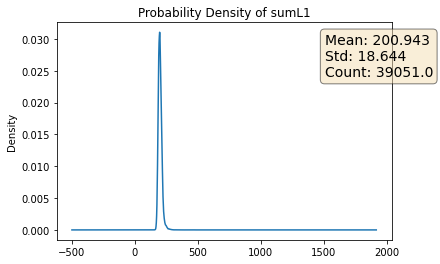

In [8]:
mdfo.getKDE("sumL1")

### Plotting Trimmed 1 D histogram
`MuonDataFrameObject.getTrimmedHistogram(query_term, num_std_dev)`


The following example shows how to plot the histogram for *sumL1* with events within 3 standard deviations

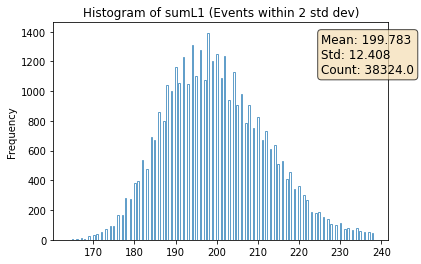

In [12]:
mdfo.getTrimmedHistogram("sumL1", numStd=2, nbins=200)

### Plotting Comparable 1 D histograms
`MuonDataFrameObject.getComparableHistogram([query_term1, query_term2])`


The following example shows how to plot two comparable histograms for *sumL1* and *sumL2*

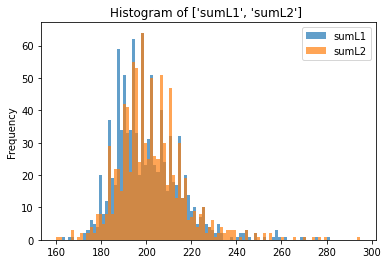

In [7]:
mdfo.getComparableHistogram(["sumL1", "sumL2"])

### Plotting Trimmed Comparable 1 D histograms
`MuonDataFrameObject.getTrimmedComparableHistogram([query_term1, query_term2], num_std_dev)`

The following example shows how to plot two comparable histograms for *sumL1* and *sumL1* with events with 3 standard deviations 

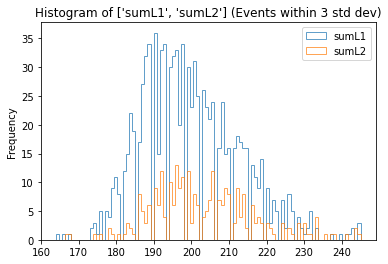

In [9]:
mdfo.getTrimmedComparableHistogram(["sumL1", "sumL2"], 3)

### Plotting Trimmed Comparable 1 D histograms
`MuonDataFrameObject.getTrimmedComparableHistogram([query_term1, query_term2], num_std_dev)`

The following example shows how to plot two comparable histograms for *sumL1* and *sumL2* with events with 3 standard deviations 

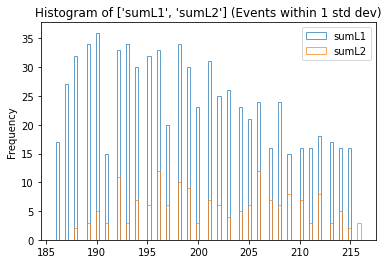

In [12]:
mdfo.getTrimmedComparableHistogram(["sumL1", "sumL2"], 1)

### Plotting Filtered 1 D histograms
`MuonDataFrameObject.getFilteredHistogram([query_term1, query_term2])`

The following example shows how to plot histograms for *sumL1* against different values of *numLHit*

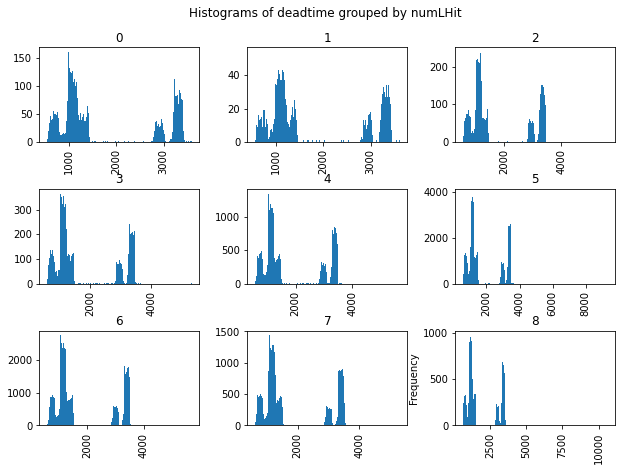

In [14]:
plt.rcParams['figure.figsize'] = [10, 7]
mdfo.getFilteredHistogram("deadtime", "numLHit")

### Plotting Time Series Plots

`MuonDataFrameObject.getPlot(query_term)`

The following example shows how to plot time series plots of *deadtime*

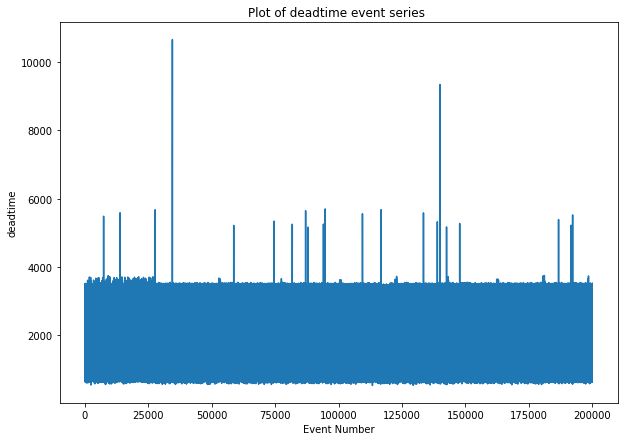

In [20]:
mdfo.getPlot("deadtime")

### Plotting Line Graphs Against Each Other

`MuonDataFrameObject.getPlot([query_term1, query_term2])`

The following example shows how to plot *L1* against *L2*

In [ ]:
mdfo.getPlot(["L1","L2"])

### Plotting Time Scatter Plots
`MuonDataFrameObject.getScatterPlot([query_term1, query_term2])`

The following example shows how to plot time scatter plot of *asymL1* against *asymL2*

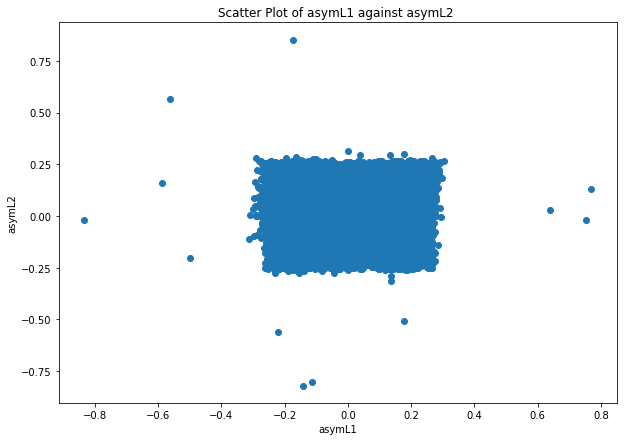

In [15]:
mdfo.getScatterPlot(["asymL1", "asymL2"])

### Plotting Time Scatter Plots
`MuonDataFrameObject.get3DScatterPlot([query_term1, query_term2, query_term3])`

The following example shows how to plot time scatter plot of *asymL1* against *asymL2* with the color axis representing *sumL1*

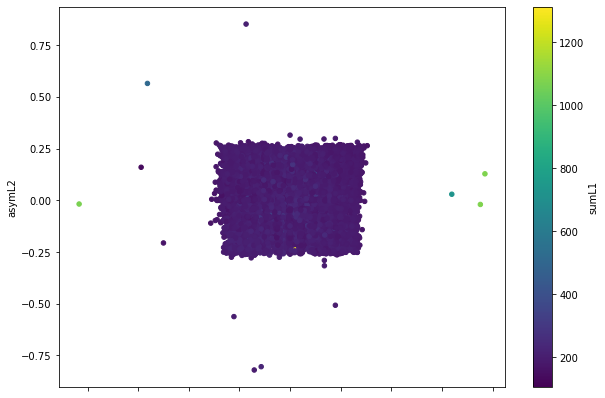

In [20]:
mdfo.get3DScatterPlot(["asymL1", "asymL2", "sumL1"])

### Generating Histogram of Numbers of Layers Hit

`MuonDataFrameObject.getNumLayersHitPlot()`

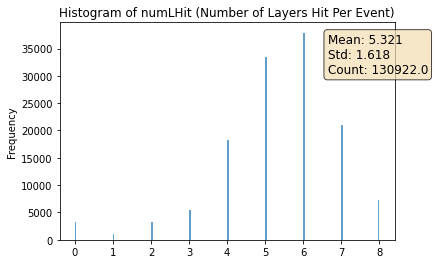

In [13]:
mdfo.getNumLayersHitPlot(pdf=False)

### Generating 2D Histograms
`MuonDataFrameObject.get2DHistogram()`


in module L1vsL2_run_801: 34.0 overflow Events


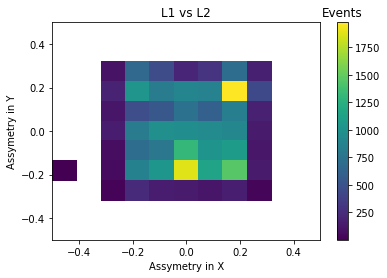

In [9]:
xmin = -0.5
xmax = 0.5
ymin = -0.5
ymax = 0.5
nbins = 11
mdfo.get2DHistogram(mdf['asymL1'].values,
                            mdf['asymL2'].values, "L1 vs L2",
                            "Assymetry in X", "Assymetry in Y", xmin, xmax,
                            ymin, ymax, nbins)

### Generating all Correlation Plots in Assymetry
`MuonDataFrameObject.allLayerCorrelationPlots()`


in module L1vsL2_run_801: 0.0 overflow Events


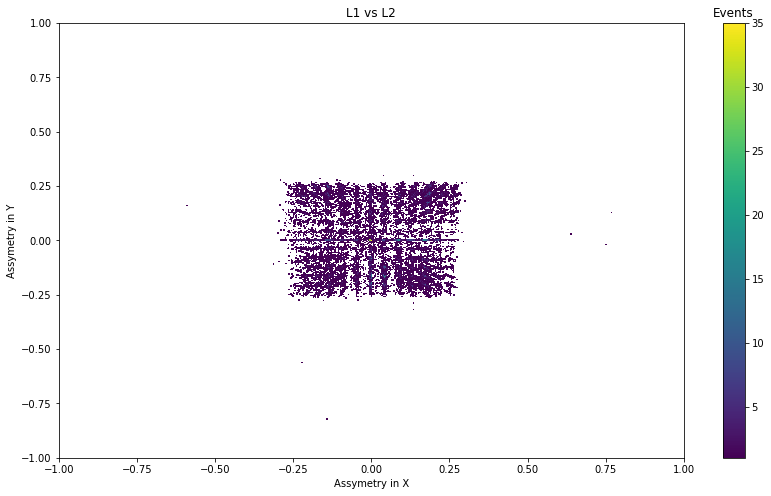

in module L3vsL4_run_801: 0.0 overflow Events


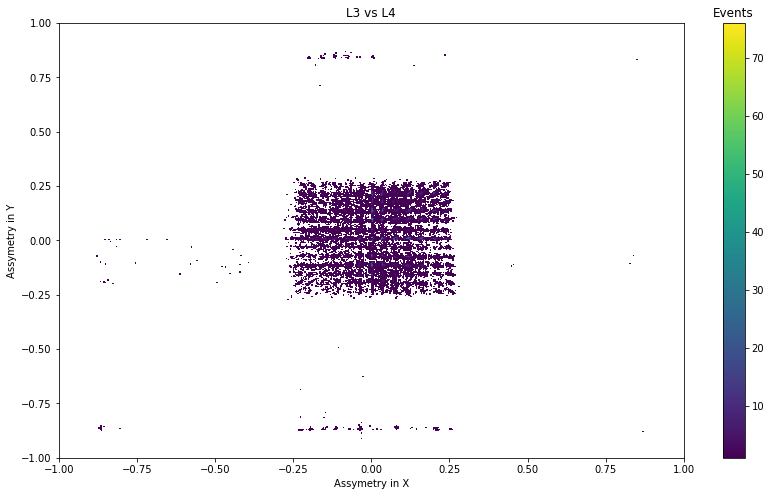

in module L1vsL3_run_801: 0.0 overflow Events


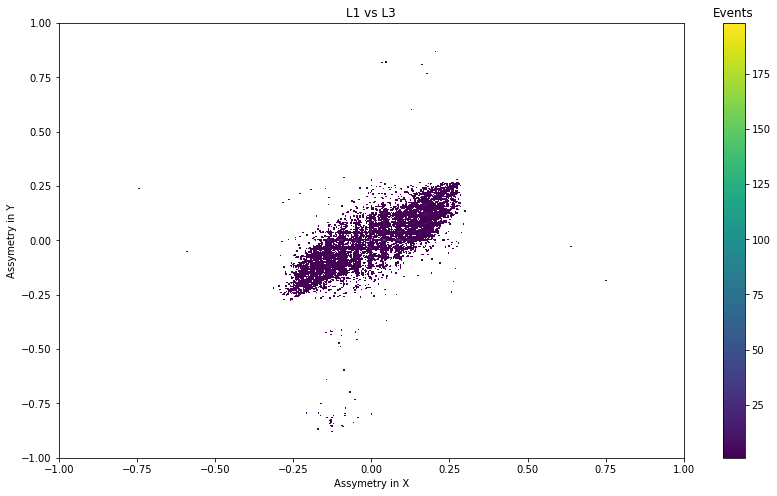

in module L2vsL4_run_801: 0.0 overflow Events


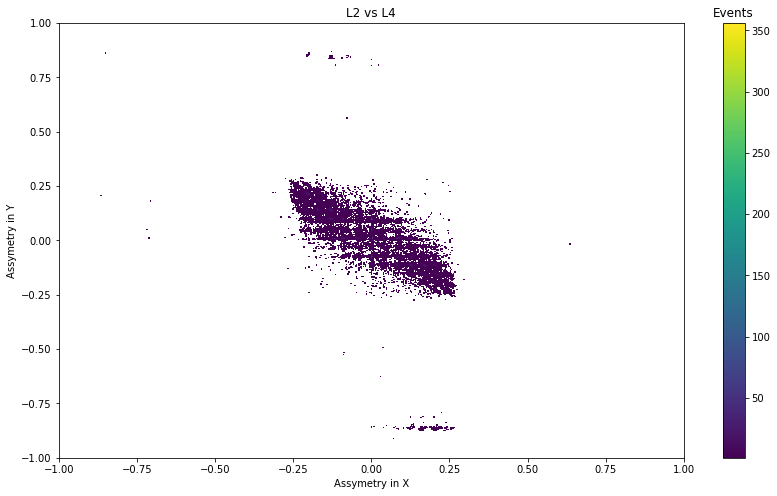

in module L1vsL4_run_801: 0.0 overflow Events


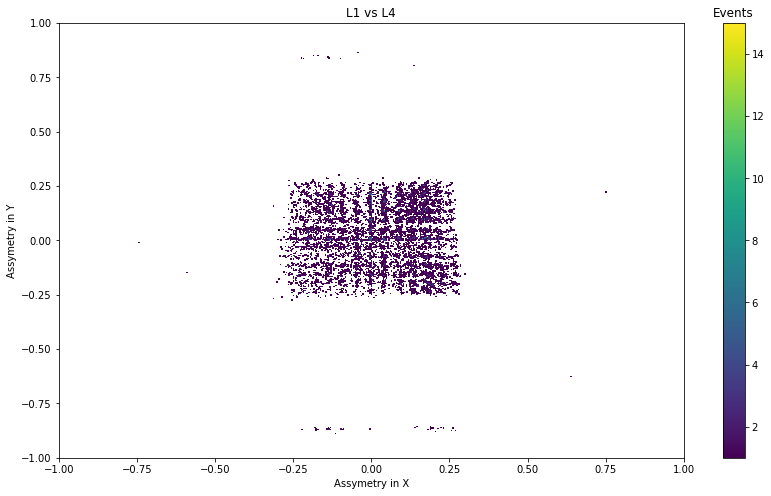

in module L2vsL3_run_801: 0.0 overflow Events


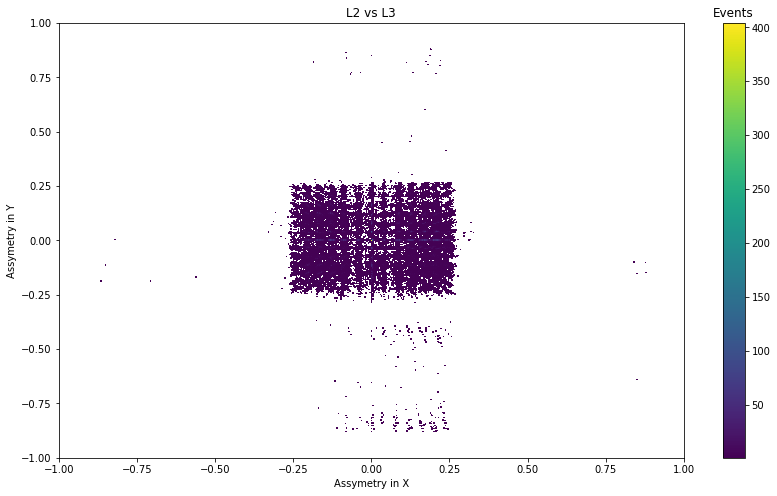

In [25]:
plt.rcParams['figure.figsize'] = [14, 8]
mdfo.allLayerCorrelationPlots()

### Generating all 1D Assymetry Plots
`MuonDataFrameObject.getAssymetry1DPlots()`

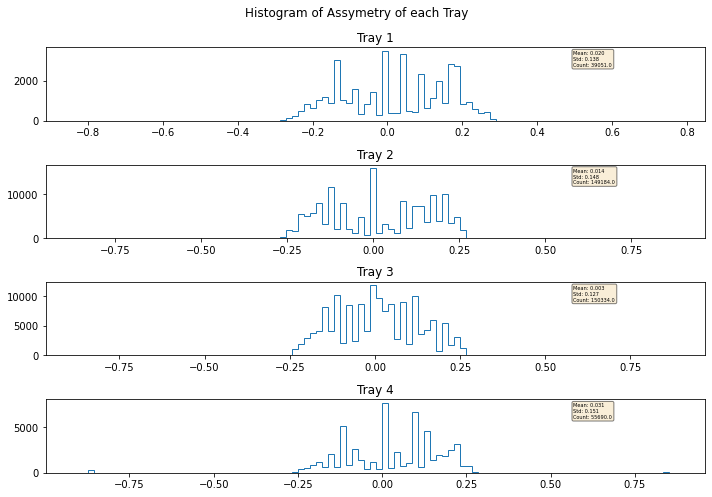

In [19]:
plt.rcParams['figure.figsize'] = [10, 7]
mdfo.getAssymetry1DPlots()

### Generating all Channel Plots
`MuonDataFrameObject.getChannelPlots()`

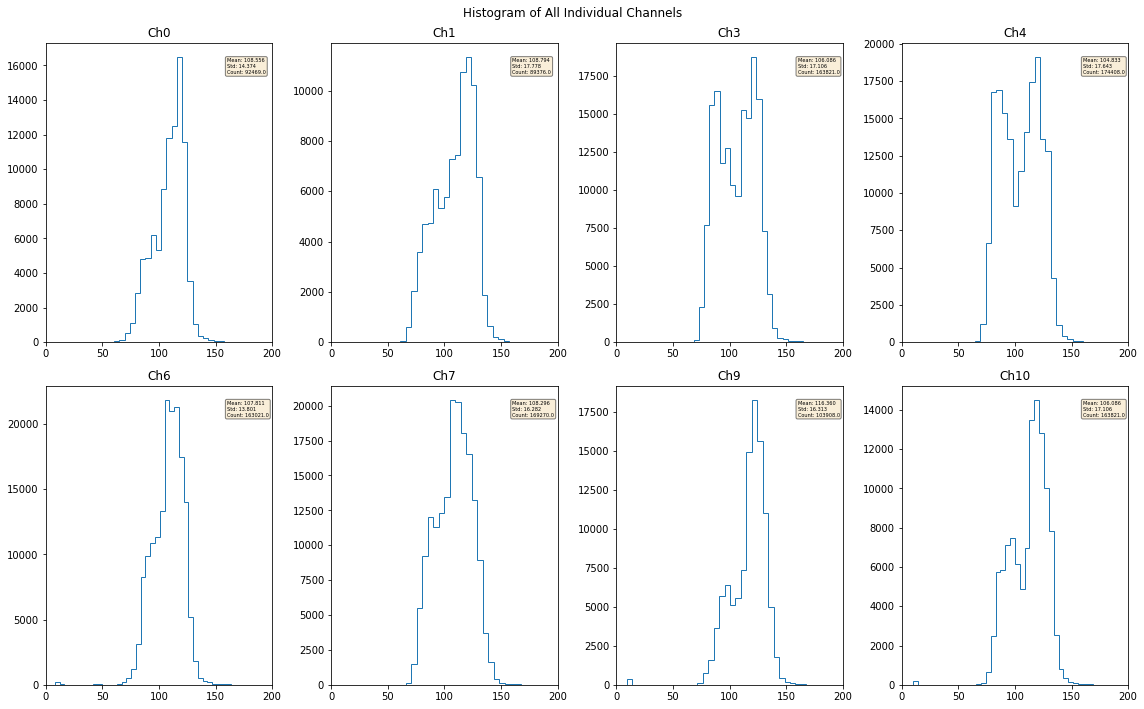

In [5]:
plt.rcParams['figure.figsize'] = [16, 10]
mdfo.getChannelPlots()

### Generating all Sum Channel Plots
`MuonDataFrameObject.getChannelSumPlots()`

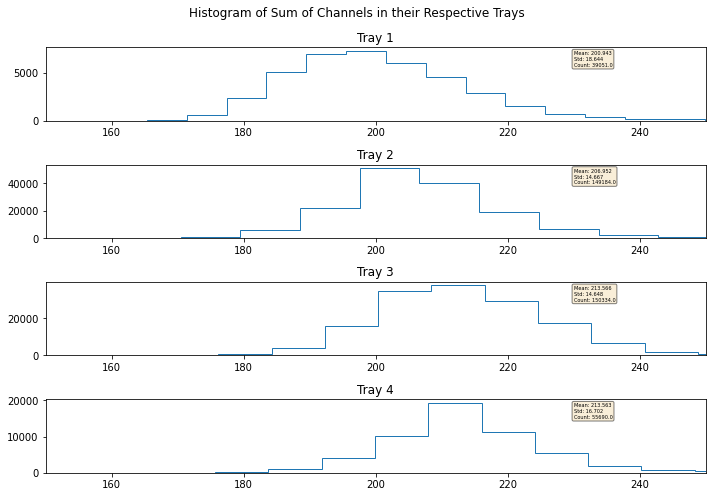

In [22]:
mdfo.getChannelSumPlots()

### Generating all Difference Channel Plots
`MuonDataFrameObject.getChannelDiffPlots()`

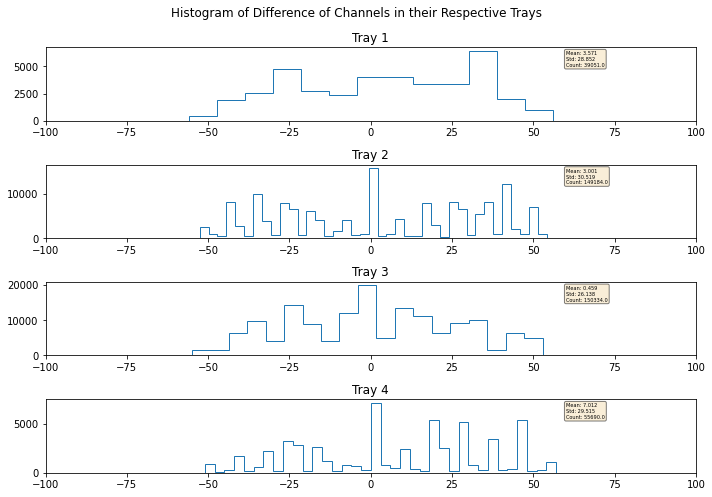

In [23]:
mdfo.getChannelDiffPlots()

### Generating all Histogram Plots of First 4 Channels of Scalar
`MuonDataFrameObject.getScalerPlots_header()`

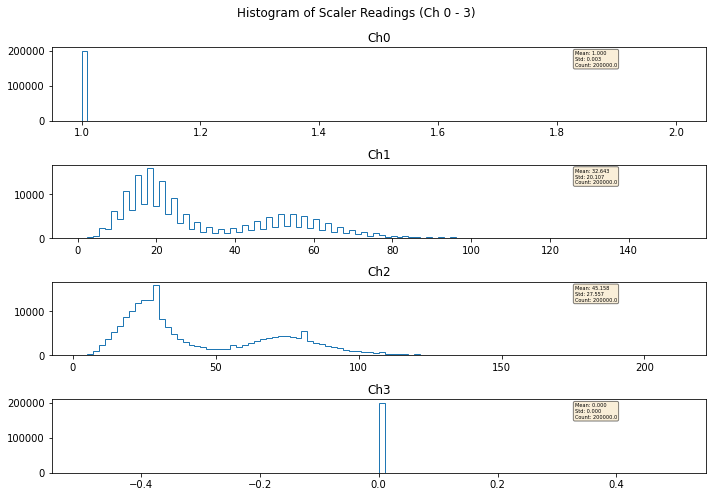

In [23]:
mdfo.getScalerPlots_header()

### Generating all Histogram Plots of Last 8 Channels of Scalar
`MuonDataFrameObject.getScalerPlots_channels()`


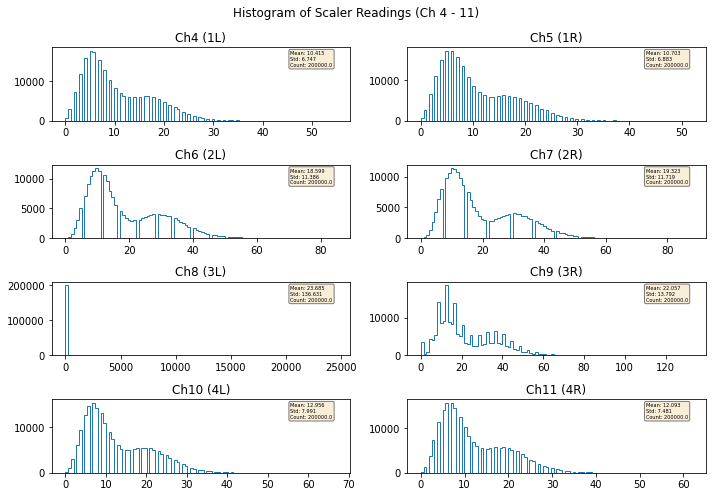

In [24]:
mdfo.getScalerPlots_channels()

## API for Creating Analysis Reports  <a class="anchor" id="fifth-bullet"></a>

This section outlines the methods needed for creating analysis results.

### Generating the Analysis Report (plots only)
`MuonDataFrameObject.getAnaReport()`


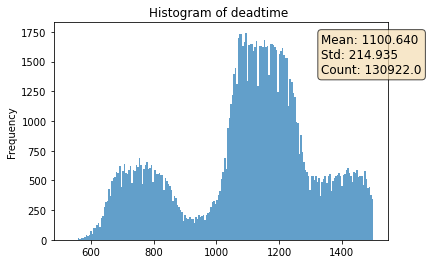

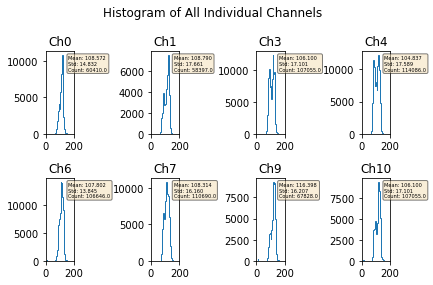

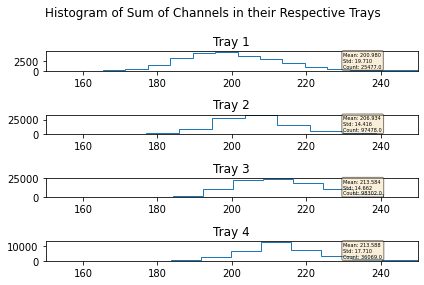

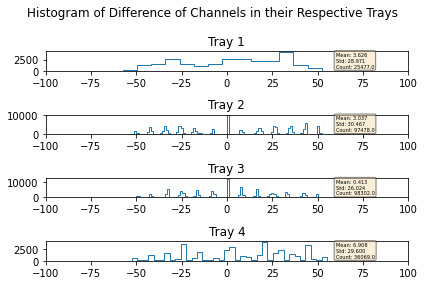

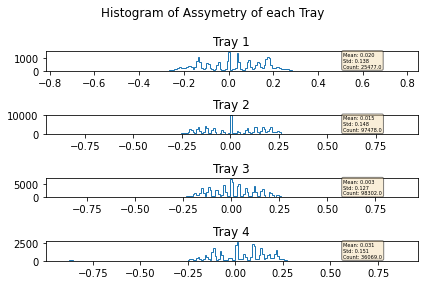

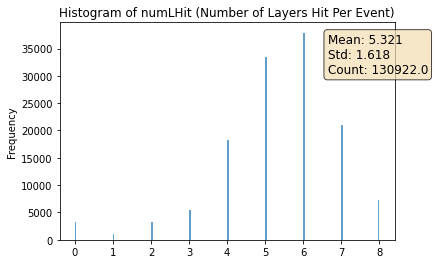

in module L1vsL2_run_801: 0.0 overflow Events


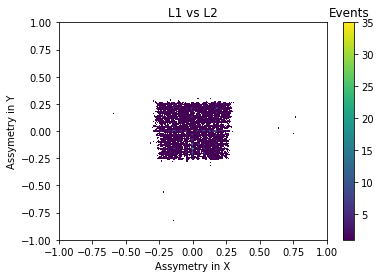

in module L3vsL4_run_801: 0.0 overflow Events


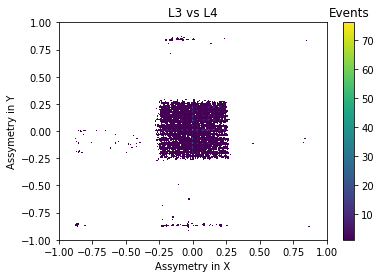

in module L1vsL3_run_801: 0.0 overflow Events


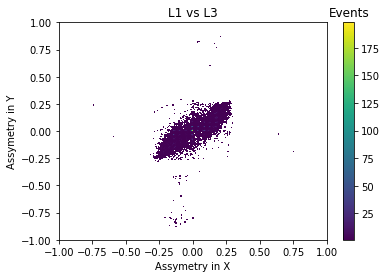

in module L2vsL4_run_801: 0.0 overflow Events


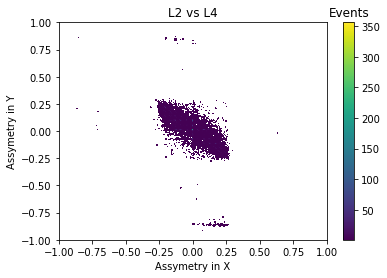

in module L1vsL4_run_801: 0.0 overflow Events


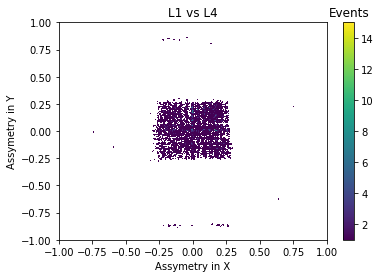

in module L2vsL3_run_801: 0.0 overflow Events


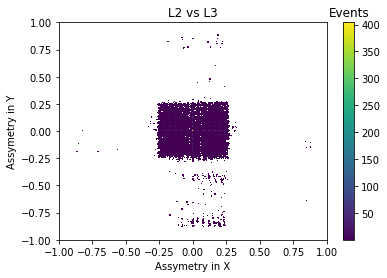

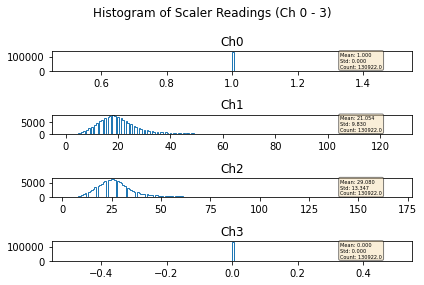

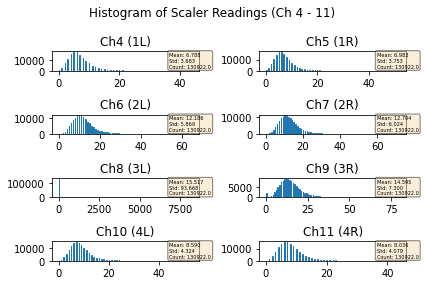

In [21]:
mdfo.getAnaReport()

### Generating the Analysis Report (pdf)
`MuonDataFrameObject.generateAnaReport()` or `MuonDataFrameObject.generateAnaReport("someName.pdf")`

The reguar method - `generateAnaReport()` with no input generates the pdf with name in the format - `events_data_frame_RUN_NUM.pdf`. Passing an argument to it will change the default name to passed argument name. 

In [25]:
plt.rcParams['figure.figsize'] = [14, 8]
mdfo.generateAnaReport()

## GUI Interface  <a class="anchor" id="sixth"></a>

To have a GUI work interface. Execute the following code.

`MuonDataFrameObject.gui()`

In [24]:
mdfo.gui()

PandasGUI ERROR — pandasgui.widgets.grapher — Plotly Express cannot process wide-form data with columns of different type.
PandasGUI ERROR — pandasgui.widgets.grapher — Plotly Express cannot process wide-form data with columns of different type.


# Remarks

The code base is maintained by Sadman Ahmed Shanto. Please reach out with any questions/concerns at `sadman-ahmed.shanto@ttu.edu`